In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
FOLDER_PATH = os.getcwd()
FILE_NAME = "\\nyc_traffic_EDA_orig.csv"
FILE_PATH = FOLDER_PATH + FILE_NAME
nyc_traffic_EDA_orig = pd.read_csv(FILE_PATH)
nyc_traffic_EDA = nyc_traffic_EDA_orig.copy()

In [3]:
nyc_traffic_EDA["Traffic_Volume_z"] = (nyc_traffic_EDA['Traffic_Volume'] - nyc_traffic_EDA['Traffic_Volume'].mean())/(nyc_traffic_EDA['Traffic_Volume'].std())

In [4]:
LANDUSE_COLUMNS = [col for col in nyc_traffic_EDA.columns if col[:9] == "LandUse_t"]

LANDUSE_TYPES = []
LANDUSE_TYPES += ["Residential"]
LANDUSE_TYPES += ["Business"]
LANDUSE_TYPES += ["Infrastructure"]
LANDUSE_TYPES += ["Public Institutions"]
LANDUSE_TYPES += ["Outside"]

LANDUSE_LOOKUP = dict(zip(LANDUSE_COLUMNS, LANDUSE_TYPES))

* SubwayProximity = Numerical
* StreetWidth = Numerical
* NumFloors = Numerical 
* Traffic Volume = Numerical 
* SegCount = Numerical
* Is_Weekend = Boolean
* Season = Categorical =(One-Hot-Encoded)=> Boolean
* 3_Hr_Intvl = Categorical (Temporal, Ordinal)
* BoroCode = Categorical
* LandUse = Categorical =(One-Hot-Encoded)=> Numerical

### 1 Variable

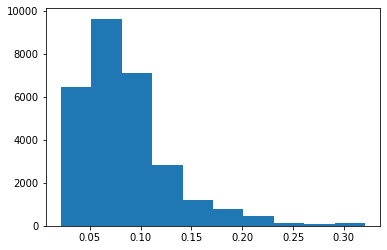

In [5]:
_ = plt.hist(nyc_traffic_EDA["SubwayProximity"])

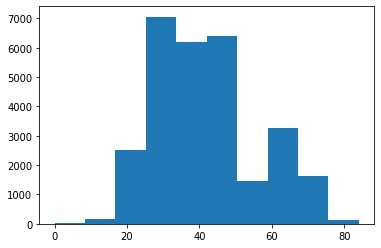

In [6]:
_ = plt.hist(nyc_traffic_EDA["StreetWidth"])

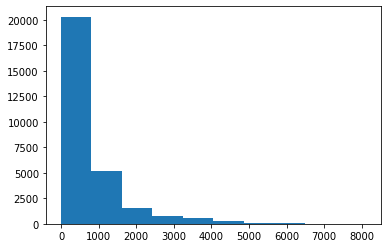

In [7]:
_ = plt.hist(nyc_traffic_EDA["Traffic_Volume"])

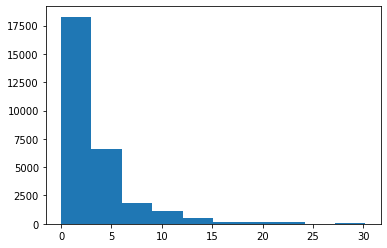

In [8]:
_ = plt.hist(nyc_traffic_EDA["NumFloors"])

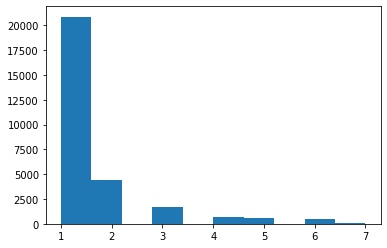

In [9]:
_ = plt.hist(nyc_traffic_EDA["SegCount"])

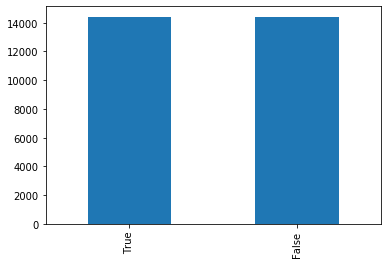

In [10]:
ax = nyc_traffic_EDA["Is_Weekend"].value_counts().plot(kind="bar")

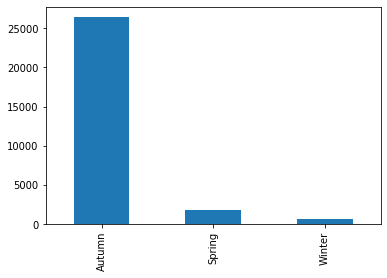

In [11]:
ax = nyc_traffic_EDA["Season"].value_counts().plot(kind="bar")

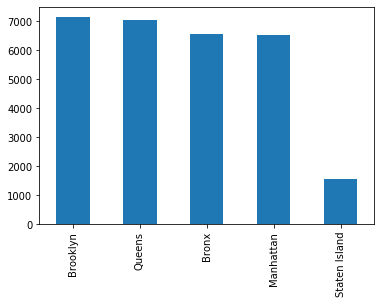

In [12]:
ax = nyc_traffic_EDA["BoroCode"].value_counts().plot(kind="bar")

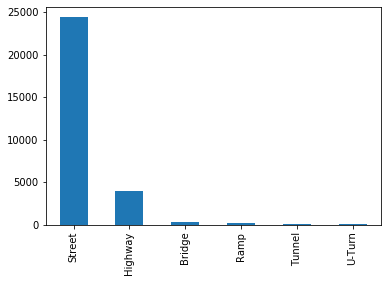

In [13]:
ax = nyc_traffic_EDA["RW_TYPE"].value_counts().plot(kind="bar")

### 2 Variables: Categorical vs Categorical

This mainly serves as a sanity check to see if our dataset is reliable

#### Residential Proportion of Boroughs
* How "residential" are each of the boroughs, from the lens of our hopefully unbiased custom dataset?

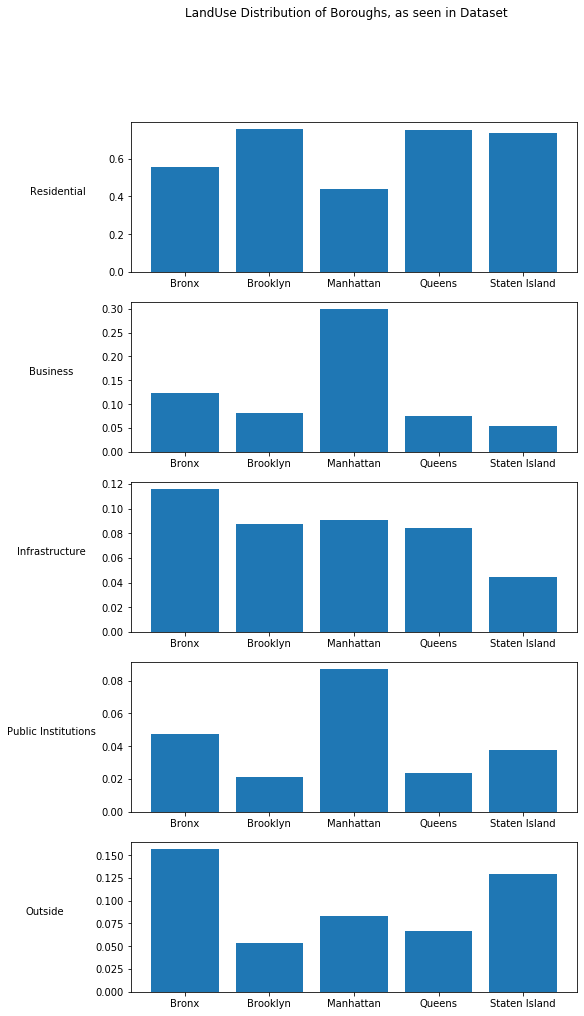

In [14]:
fig, axs = plt.subplots(len(LANDUSE_COLUMNS), sharex=False,figsize=(8,16))
fig.suptitle('LandUse Distribution of Boroughs, as seen in Dataset')
for i in range(len(LANDUSE_COLUMNS)):
    LANDUSE_COLUMN = LANDUSE_COLUMNS[i]
    LANDUSE_TYPE = LANDUSE_TYPES[i]
    mean_landuse_prop_by_borough = nyc_traffic_EDA.groupby(["BoroCode"])[LANDUSE_COLUMN].mean()
    axs[i].bar(mean_landuse_prop_by_borough.index,mean_landuse_prop_by_borough.values)
    axs[i].set_ylabel(LANDUSE_TYPE, rotation=0, labelpad=50)

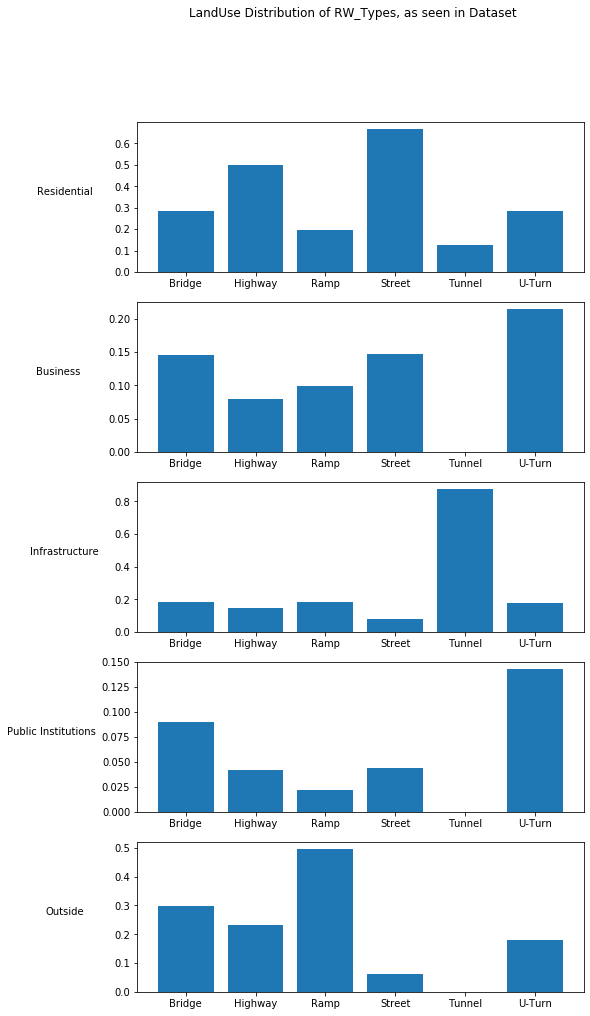

In [15]:
fig, axs = plt.subplots(len(LANDUSE_COLUMNS), sharex=False,figsize=(8,16))
fig.suptitle('LandUse Distribution of RW_Types, as seen in Dataset')
for i in range(len(LANDUSE_COLUMNS)):
    LANDUSE_COLUMN = LANDUSE_COLUMNS[i]
    LANDUSE_TYPE = LANDUSE_TYPES[i]
    mean_landuse_prop_by_borough = nyc_traffic_EDA.groupby(["RW_TYPE"])[LANDUSE_COLUMN].mean()
    axs[i].bar(mean_landuse_prop_by_borough.index,mean_landuse_prop_by_borough.values)
    axs[i].set_ylabel(LANDUSE_TYPE, rotation=0, labelpad=50)

### 2 Variables: Categorical vs Numerical

In [16]:
def EDA_barplot(TABLE, CATEGORICAL_COLUMN_NAME, NUMERICAL_COLUMN_NAME):
    TITLE = "{0} by {1}".format(CATEGORICAL_COLUMN_NAME, NUMERICAL_COLUMN_NAME)
    ax = TABLE.groupby([CATEGORICAL_COLUMN_NAME])[NUMERICAL_COLUMN_NAME].mean().plot(kind="bar")
    ax.set_title(TITLE)
    ax.set_ylabel("Mean {0}".format(NUMERICAL_COLUMN_NAME))
    return ax

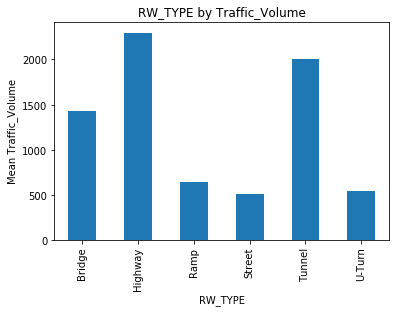

In [17]:
EDA_barplot(nyc_traffic_EDA, "RW_TYPE", "Traffic_Volume") # duh

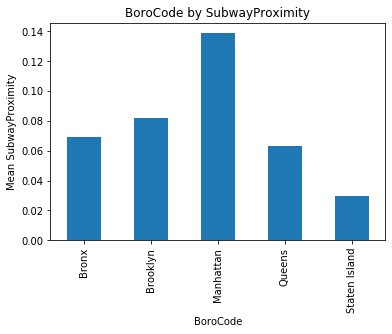

In [18]:
EDA_barplot(nyc_traffic_EDA, "BoroCode", "SubwayProximity")

In [19]:
# EDA_barplot(nyc_traffic_EDA, "BoroCode", "StreetWidth") # Cringe

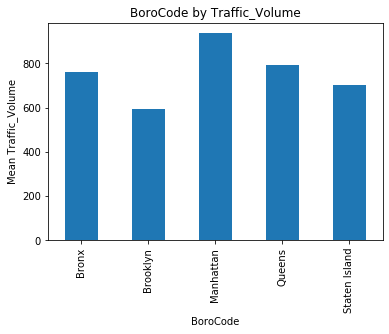

In [20]:
EDA_barplot(nyc_traffic_EDA, "BoroCode", "Traffic_Volume")

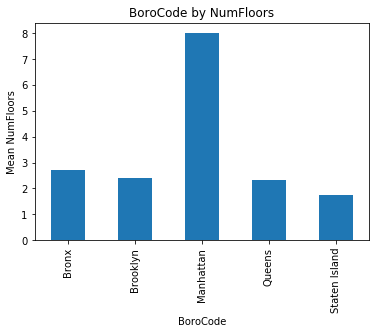

In [21]:
EDA_barplot(nyc_traffic_EDA, "BoroCode", "NumFloors") #duh

In [22]:
# EDA_barplot(nyc_traffic_EDA, "Season", "Traffic_Volume") # cringe

### Numerical vs Numerical

In [23]:
def EDA_scatterplot(TABLE, NUMERICAL_COLUMN_1_NAME, NUMERICAL_COLUMN_2_NAME):
    TABLE = nyc_traffic_EDA
    TITLE = "{0} by {1}".format(NUMERICAL_COLUMN_1_NAME, NUMERICAL_COLUMN_2_NAME)
    X_LABEL = NUMERICAL_COLUMN_1_NAME
    Y_LABEL = NUMERICAL_COLUMN_2_NAME
    NUMERICAL_COLUMN_1 = TABLE[NUMERICAL_COLUMN_1_NAME]
    NUMERICAL_COLUMN_2 = TABLE[NUMERICAL_COLUMN_2_NAME]
    fig, ax = plt.subplots()
    ax.scatter(NUMERICAL_COLUMN_1, NUMERICAL_COLUMN_2,s=1, alpha=0.1)
    ax.set_title(TITLE)
    ax.set_xlabel(X_LABEL)
    ax.set_ylabel(Y_LABEL)
    return ax


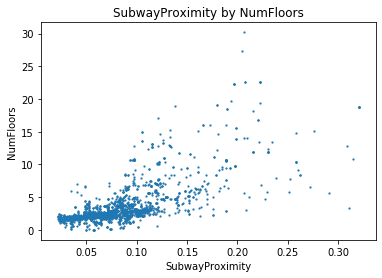

In [24]:
EDA_scatterplot(nyc_traffic_EDA, "SubwayProximity", "NumFloors") # Based

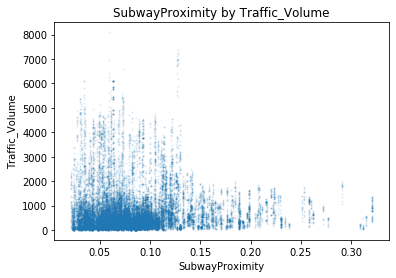

In [25]:
EDA_scatterplot(nyc_traffic_EDA, "SubwayProximity", "Traffic_Volume") # Sus

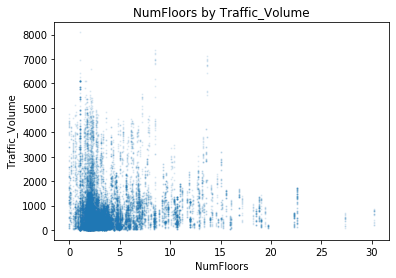

In [26]:
EDA_scatterplot(nyc_traffic_EDA, "NumFloors", "Traffic_Volume") # Sus

# When the average floor-count of the buildings surrounding the street segment is high, traffic volume tends to be low.
# but the converse cannot be said: when the average floor-count is low, traffic volume could vary

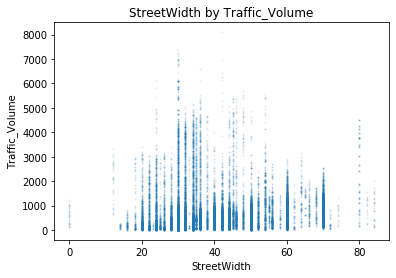

In [27]:
EDA_scatterplot(nyc_traffic_EDA, "StreetWidth", "Traffic_Volume") # Cringe

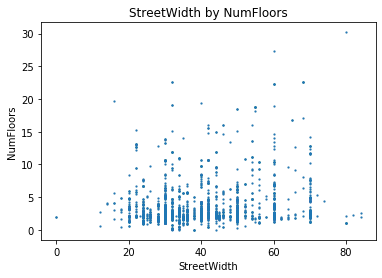

In [28]:
EDA_scatterplot(nyc_traffic_EDA, "StreetWidth", "NumFloors") # Cringe

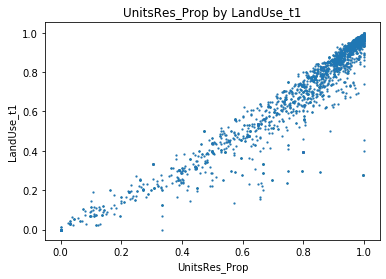

In [29]:
EDA_scatterplot(nyc_traffic_EDA, "UnitsRes_Prop", "LandUse_t1") # Based

In [30]:
# EDA_scatterplot(nyc_traffic_EDA, "SegCount", "Traffic_Volume") # sus?

### Higher Variable Dimension Data Analysis

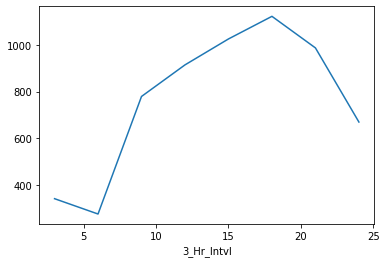

In [31]:
nyc_traffic_EDA.groupby(["3_Hr_Intvl"])["Traffic_Volume"].mean().plot(kind="line")

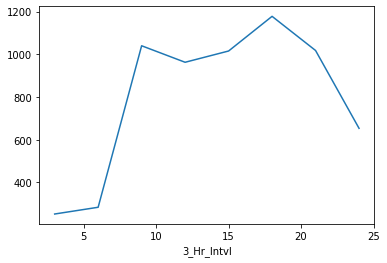

In [32]:
nyc_traffic_EDA[nyc_traffic_EDA["Is_Weekend"]!=True].groupby(["3_Hr_Intvl"])["Traffic_Volume"].mean().plot(kind="line")

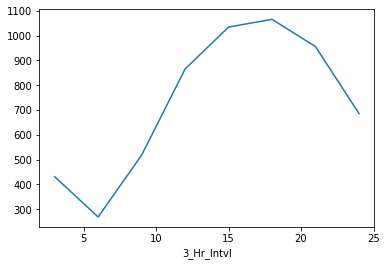

In [33]:
nyc_traffic_EDA[nyc_traffic_EDA["Is_Weekend"]==True].groupby(["3_Hr_Intvl"])["Traffic_Volume"].mean().plot(kind="line")

#### Different Seasons and their traffic volume by time of day

Text(0.5, 1.0, 'Seasons and Traffic Volume during Time of Day')

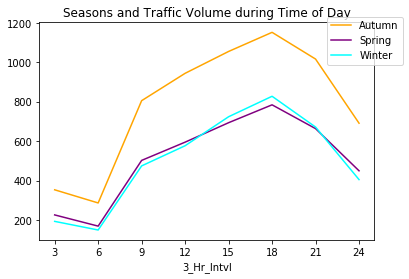

In [34]:
colors = ["orange", "purple", "cyan", "red", "green"]

nyc_traffic_EDA_weekdays = nyc_traffic_EDA#[nyc_traffic_EDA["Is_Weekend"]!=False]
fig, ax = plt.subplots()
ax.set_xticks(range(3,27,3))
df_grouped = nyc_traffic_EDA_weekdays.groupby(["Season"])
for i in range(len(df_grouped)):
    key, group = list(df_grouped)[i]
    group.groupby('3_Hr_Intvl')['Traffic_Volume'].mean().plot(ax=ax,label=str(key),c=colors[i])
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title("Seasons and Traffic Volume during Time of Day")

#### Boroughs and their traffic volume by time of day

Text(0.5, 1.0, 'Boroughs and Traffic Volume during Time of Day')

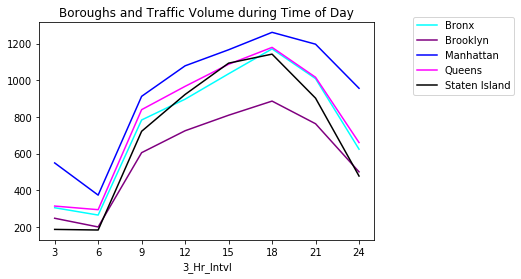

In [35]:
colors = ["cyan", "purple", "blue", "magenta", "black"]

nyc_traffic_EDA_weekdays = nyc_traffic_EDA
fig, ax = plt.subplots()
ax.set_xticks(range(3,27,3))
df_grouped = nyc_traffic_EDA_weekdays.groupby(["BoroCode"])
for i in range(len(df_grouped)):
    key, group = list(df_grouped)[i]
    group.groupby('3_Hr_Intvl')['Traffic_Volume'].mean().plot(ax=ax,label=str(key),c=colors[i])
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title("Boroughs and Traffic Volume during Time of Day")

#### Predominant LandUse and their traffic volume by time of day

Text(0.5, 1.0, 'LandUse and Traffic Volume during Time of Day')

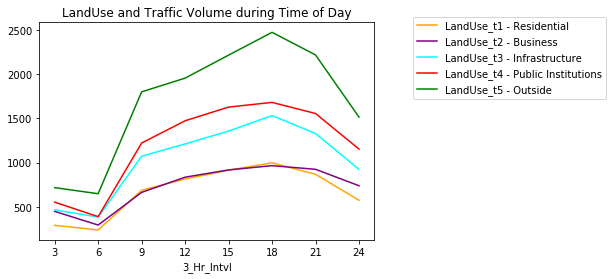

In [36]:
nyc_traffic_EDA["Predominant_LandUse"] = nyc_traffic_EDA.loc[:,LANDUSE_COLUMNS].idxmax(axis=1)

colors = ["orange", "purple", "cyan", "red", "green"]

nyc_traffic_EDA_weekdays = nyc_traffic_EDA#[nyc_traffic_EDA["Is_Weekend"]==False]
fig, ax = plt.subplots()
ax.set_xticks(range(0,27,3))
df_grouped = nyc_traffic_EDA_weekdays.groupby(["Predominant_LandUse"])
for i in range(len(df_grouped)):
    key, group = list(df_grouped)[i]
    group.groupby('3_Hr_Intvl')['Traffic_Volume'].mean().plot(ax=ax,label=str(key)+" - "+LANDUSE_LOOKUP[key],c=colors[i])
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title("LandUse and Traffic Volume during Time of Day")

#### Is_Weekend and their traffic volume by time of day

Text(0.5, 1.0, 'Is_Weekend and Traffic Volume during Time of Day')

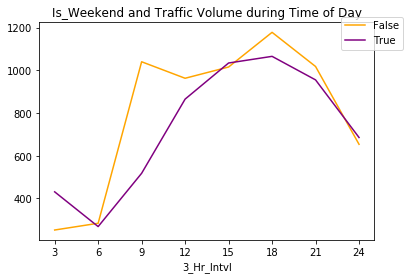

In [37]:
colors = ["orange", "purple", "cyan", "red", "green"]

nyc_traffic_EDA_weekdays = nyc_traffic_EDA#[nyc_traffic_EDA["Is_Weekend"]==False]
fig, ax = plt.subplots()
ax.set_xticks(range(0,27,3))
df_grouped = nyc_traffic_EDA_weekdays.groupby(["Is_Weekend"])
for i in range(len(df_grouped)):
    key, group = list(df_grouped)[i]
    group.groupby('3_Hr_Intvl')['Traffic_Volume'].mean().plot(ax=ax,label=str(key),c=colors[i])
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title("Is_Weekend and Traffic Volume during Time of Day")

#### LandUse Proportion and Traffic Volume
* Let's get more elaborate. Is there any correlation between a LandUse category (like Residential) and Traffic Volume.

In [38]:
LANDUSE_COLUMN = "LandUse_t2"

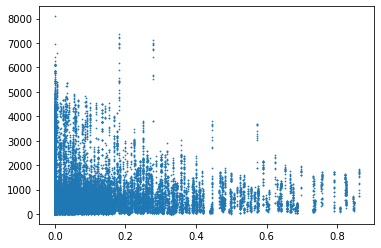

In [39]:
plt.scatter(nyc_traffic_EDA[LANDUSE_COLUMN], nyc_traffic_EDA["Traffic_Volume"], s=0.5)

#### Doing Permutation Testing on Traffic Volume with LandUse

Null hypothesis: In the population, the distribution of birth weights of babies is the same for mothers who don’t smoke as for mothers who do. The difference in the sample is due to chance.

Alternative hypothesis: In the population, the babies of the mothers who smoke have a lower birth weight, on average, than the babies of the non-smokers.

-359.9054644937927


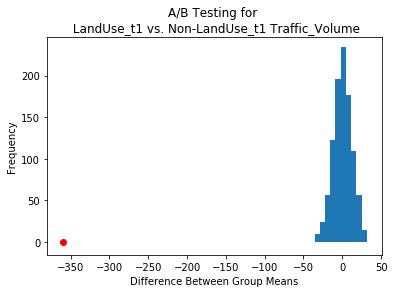

In [40]:
nyc_traffic_EDA_temp = nyc_traffic_EDA.copy()
LANDUSE_COLUMN = LANDUSE_COLUMNS[0]
TABLE = nyc_traffic_EDA_temp
GROUPBY_COLUMN_NAME = LANDUSE_COLUMN
AGGREG_COLUMN_NAME = "Traffic_Volume"
SHUFFLED_COLUMN_NAME = GROUPBY_COLUMN_NAME
#SHUFFLED_COLUMN_NAME = AGGREG_COLUMN_NAME
SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

AB_TESTING_PLOT_TITLE = "A/B Testing for \n {0} vs. Non-{0} {1}".format(GROUPBY_COLUMN_NAME, AGGREG_COLUMN_NAME)
AB_TESTING_PLOT_X_LABEL = "Difference Between Group Means"
AB_TESTING_PLOT_Y_LABEL = "Frequency"

test_stats = []
T = 1000

nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] = (nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] >= 0.5)
SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

observed_test_stat = nyc_traffic_EDA_temp.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]

for i in range(T):
    SHUFFLED_COLUMN = np.random.permutation(SHUFFLED_COLUMN)
    # shuffle
    TABLE[SHUFFLED_COLUMN_NAME] = SHUFFLED_COLUMN
    # re-assign
    test_stat = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]
    test_stats.append(test_stat)

plt.hist(test_stats)
plt.title(AB_TESTING_PLOT_TITLE)
plt.xlabel(AB_TESTING_PLOT_X_LABEL)
plt.ylabel(AB_TESTING_PLOT_Y_LABEL)


plt.scatter(observed_test_stat,0,color="red")
print(observed_test_stat)

#### Doing Permutation Testing on Traffic Volume with Borough

In [41]:
def ABTesting_Borough_Traffic(BORO):
    nyc_traffic_EDA_temp = nyc_traffic_EDA.copy()
    BORO_CHOICE = BORO
    TABLE = nyc_traffic_EDA_temp
    GROUPBY_COLUMN_NAME = "BoroCode"
    AGGREG_COLUMN_NAME = "Traffic_Volume"
    SHUFFLED_COLUMN_NAME = GROUPBY_COLUMN_NAME
    #SHUFFLED_COLUMN_NAME = AGGREG_COLUMN_NAME
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values
    AB_TESTING_PLOT_TITLE = "A/B Testing for \n {0} vs. Non-{0} {1}".format(BORO_CHOICE, AGGREG_COLUMN_NAME)
    AB_TESTING_PLOT_X_LABEL = "Difference Between Group Means"
    AB_TESTING_PLOT_Y_LABEL = "Frequency"

    test_stats = []
    T = 1000

    nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] = (nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] == BORO_CHOICE)
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

    observed_test_stat = nyc_traffic_EDA_temp.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]

    for i in range(T):
        SHUFFLED_COLUMN = np.random.permutation(SHUFFLED_COLUMN)
        # shuffle
        TABLE[SHUFFLED_COLUMN_NAME] = SHUFFLED_COLUMN
        # re-assign
        #print(len(TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean()))
        test_stat = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]
        test_stats.append(test_stat)
    
    fig, ax = plt.subplots()
    ax.hist(test_stats)
    ax.set_title(AB_TESTING_PLOT_TITLE)
    ax.set_xlabel(AB_TESTING_PLOT_X_LABEL)
    ax.set_ylabel(AB_TESTING_PLOT_Y_LABEL)
    
    ax.scatter(observed_test_stat,0,color="red")
    return (ax, test_stats, observed_test_stat)

In [42]:
def ABTesting_Borough_Traffic(BORO):
    nyc_traffic_EDA_temp = nyc_traffic_EDA.copy()
    BORO_CHOICE = BORO
    TABLE = nyc_traffic_EDA_temp
    GROUPBY_COLUMN_NAME = "BoroCode"
    AGGREG_COLUMN_NAME = "Traffic_Volume"
    SHUFFLED_COLUMN_NAME = GROUPBY_COLUMN_NAME
    #SHUFFLED_COLUMN_NAME = AGGREG_COLUMN_NAME
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values
    AB_TESTING_PLOT_TITLE = "A/B Testing for \n {0} vs. Non-{0} {1}".format(BORO_CHOICE, AGGREG_COLUMN_NAME)
    AB_TESTING_PLOT_X_LABEL = "Difference Between Group Means"
    AB_TESTING_PLOT_Y_LABEL = "Frequency"

    test_stats = []
    T = 1000

    nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] = (nyc_traffic_EDA_temp[GROUPBY_COLUMN_NAME] == BORO_CHOICE)
    SHUFFLED_COLUMN = TABLE[SHUFFLED_COLUMN_NAME].values

    observed_test_stat = nyc_traffic_EDA_temp.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]

    for i in range(T):
        SHUFFLED_COLUMN = np.random.permutation(SHUFFLED_COLUMN)
        # shuffle
        TABLE[SHUFFLED_COLUMN_NAME] = SHUFFLED_COLUMN
        # re-assign
        #print(len(TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean()))
        test_stat = TABLE.groupby([GROUPBY_COLUMN_NAME])[AGGREG_COLUMN_NAME].mean().diff().loc[1]
        test_stats.append(test_stat)
    
    fig, ax = plt.subplots()
    ax.hist(test_stats)
    ax.set_title(AB_TESTING_PLOT_TITLE)
    ax.set_xlabel(AB_TESTING_PLOT_X_LABEL)
    ax.set_ylabel(AB_TESTING_PLOT_Y_LABEL)
    
    ax.scatter(observed_test_stat,0,color="red")
    return (ax, test_stats, observed_test_stat)

P-value is  0.0


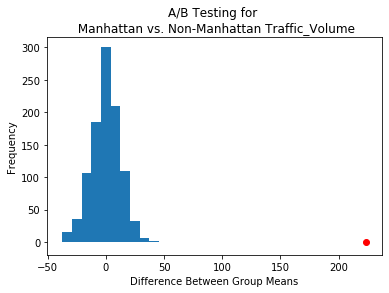

In [43]:
ax, test_stats, observed_test_stat = ABTesting_Borough_Traffic("Manhattan")
print("P-value is ", (np.array(test_stats) > (observed_test_stat)).mean())
ax